In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [91]:
dataset = pd.read_csv('./Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.9781021897810219


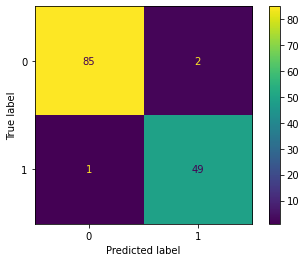

In [100]:
model = classifier.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
print(accuracy_score(y_test, model))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, model))
disp.plot()

In [105]:
from sklearn.model_selection import cross_val_score
kfold = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(kfold.mean()*100))
print("Standarad Deviation: {:.2f} %".format(kfold.std()*100))

Accuracy: 96.53 %
Standarad Deviation: 2.63 %
